In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

IMPORTING CSV

In [121]:
df=pd.read_csv(r'/content/data/VICTIMS.csv')

In [122]:
df.head(10)

,STATE/UT,YEAR,Pupose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
0,Andhra Pradesh,2001,For Adoption,8,3,1,0,0,0,0,0,4,0,0,0,0,3,5,8
1,Andhra Pradesh,2001,For Begging,2,0,0,2,0,0,0,0,0,0,0,0,0,2,0,2
2,Andhra Pradesh,2001,For Camel racing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,For Illicit intercourse,78,0,2,0,25,0,24,0,25,0,2,0,0,0,78,78
4,Andhra Pradesh,2001,For marriage,339,0,0,0,73,1,164,6,91,0,4,0,0,7,332,339
5,Andhra Pradesh,2001,For Prostitution,36,0,0,0,1,0,17,0,16,0,2,0,0,0,36,36
6,Andhra Pradesh,2001,For Ransom,13,1,0,0,0,6,3,2,0,1,0,0,0,10,3,13
7,Andhra Pradesh,2001,For Revenge,47,3,0,4,1,4,7,11,4,12,1,0,0,34,13,47
8,Andhra Pradesh,2001,For Sale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Andhra Pradesh,2001,For Selling body parts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
df.tail(10)

,STATE/UT,YEAR,Pupose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
5856,Puducherry,2012,For marriage,11,0,0,0,0,0,10,0,1,0,0,0,0,0,11,11
5857,Puducherry,2012,For Prostitution,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5858,Puducherry,2012,For Ransom,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5859,Puducherry,2012,For Revenge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5860,Puducherry,2012,For Sale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5861,Puducherry,2012,For Selling body parts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5862,Puducherry,2012,For Slavery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5863,Puducherry,2012,For unlawaful activity,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5864,Puducherry,2012,Others,8,2,4,1,1,0,0,0,0,0,0,0,0,3,5,8
5865,Puducherry,2012,Total,19,2,4,1,1,0,10,0,1,0,0,0,0,3,16,19


In [124]:
df.rename(columns={
    'STATE/UT': 'State_UT',
    'YEAR': 'Year',
    'Pupose': 'Purpose',
    'Total No. of cases reported': 'Total_Cases_Reported',
    'Male upto 10 years': 'Male_Upto_10',
    'Female upto 10 years': 'Female_Upto_10',
    'Male 10-15 years': 'Male_10_15',
    'Female 10-15 years': 'Female_10_15',
    'Male 15-18 years': 'Male_15_18',
    'Female 15-18 years': 'Female_15_18',
    'Male 18-30 years': 'Male_18_30',
    'Female 18-30 years': 'Female_18_30',
    'Male 30-50 years': 'Male_30_50',
    'Female 30-50 years': 'Female_30_50',
    'Male above 50 years': 'Male_Above_50',
    'Female above 50 years': 'Female_Above_50',
    'Total Male': 'Total_Male',
    'Total Female': 'Total_Female',
    'Grand Total': 'Grand_Total'
}, inplace=True)


In [125]:
df.head()

,State_UT,Year,Purpose,Total_Cases_Reported,Male_Upto_10,Female_Upto_10,Male_10_15,Female_10_15,Male_15_18,Female_15_18,Male_18_30,Female_18_30,Male_30_50,Female_30_50,Male_Above_50,Female_Above_50,Total_Male,Total_Female,Grand_Total
0,Andhra Pradesh,2001,For Adoption,8,3,1,0,0,0,0,0,4,0,0,0,0,3,5,8
1,Andhra Pradesh,2001,For Begging,2,0,0,2,0,0,0,0,0,0,0,0,0,2,0,2
2,Andhra Pradesh,2001,For Camel racing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,For Illicit intercourse,78,0,2,0,25,0,24,0,25,0,2,0,0,0,78,78
4,Andhra Pradesh,2001,For marriage,339,0,0,0,73,1,164,6,91,0,4,0,0,7,332,339


In [126]:
df.tail()

,State_UT,Year,Purpose,Total_Cases_Reported,Male_Upto_10,Female_Upto_10,Male_10_15,Female_10_15,Male_15_18,Female_15_18,Male_18_30,Female_18_30,Male_30_50,Female_30_50,Male_Above_50,Female_Above_50,Total_Male,Total_Female,Grand_Total
5861,Puducherry,2012,For Selling body parts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5862,Puducherry,2012,For Slavery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5863,Puducherry,2012,For unlawaful activity,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5864,Puducherry,2012,Others,8,2,4,1,1,0,0,0,0,0,0,0,0,3,5,8
5865,Puducherry,2012,Total,19,2,4,1,1,0,10,0,1,0,0,0,0,3,16,19


In [127]:
df.shape


(5866, 19)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5866 entries, 0 to 5865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State_UT              5866 non-null   object
 1   Year                  5866 non-null   int64 
 2   Purpose               5866 non-null   object
 3   Total_Cases_Reported  5866 non-null   int64 
 4   Male_Upto_10          5866 non-null   int64 
 5   Female_Upto_10        5866 non-null   int64 
 6   Male_10_15            5866 non-null   int64 
 7   Female_10_15          5866 non-null   int64 
 8   Male_15_18            5866 non-null   int64 
 9   Female_15_18          5866 non-null   int64 
 10  Male_18_30            5866 non-null   int64 
 11  Female_18_30          5866 non-null   int64 
 12  Male_30_50            5866 non-null   int64 
 13  Female_30_50          5866 non-null   int64 
 14  Male_Above_50         5866 non-null   int64 
 15  Female_Above_50       5866 non-null   

In [129]:
df.isnull().sum()

,0
State_UT,0
Year,0
Purpose,0
Total_Cases_Reported,0
Male_Upto_10,0
Female_Upto_10,0
Male_10_15,0
Female_10_15,0
Male_15_18,0
Female_15_18,0


In [130]:
df.describe()

,Year,Total_Cases_Reported,Male_Upto_10,Female_Upto_10,Male_10_15,Female_10_15,Male_15_18,Female_15_18,Male_18_30,Female_18_30,Male_30_50,Female_30_50,Male_Above_50,Female_Above_50,Total_Male,Total_Female,Grand_Total
count,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000,5866.000000
mean,2006.513126,121.667917,1.802932,1.216161,2.426526,6.320491,2.510740,19.857143,16.400614,52.993863,8.548585,9.842823,0.955336,0.363450,32.644732,90.593931,123.238663
std,3.445978,465.198526,16.321285,9.121776,30.860644,36.194204,17.738711,117.901238,75.366121,218.121242,36.858145,54.903563,7.395493,6.547786,141.072094,377.255718,469.614659
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.000000,7.000000,22.000000
max,2012.000000,8878.000000,408.000000,209.000000,953.000000,906.000000,530.000000,3081.000000,1371.000000,3682.000000,1042.000000,1053.000000,334.000000,332.000000,2465.000000,7919.000000,8888.000000


In [131]:
# Group by purpose and sum the total victims
purpose_totals = df.groupby('Purpose')['Grand_Total'].sum().sort_values(ascending=False)

# Display the actual totals
print(purpose_totals)

Purpose
Total                      361459
For marriage               165838
Others                     131560
For Illicit intercourse     30083
For Ransom                  10681
For unlawaful activity       7912
For Revenge                  7162
For Prostitution             4491
For Adoption                 1297
For Slavery                  1005
For Sale                      964
For Begging                   355
For Camel racing               79
For Selling body parts         17
For unlawful activity          15
Name: Grand_Total, dtype: int64


**EDA AND VISUALISATION**

In [132]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

**Total Victims by Year**

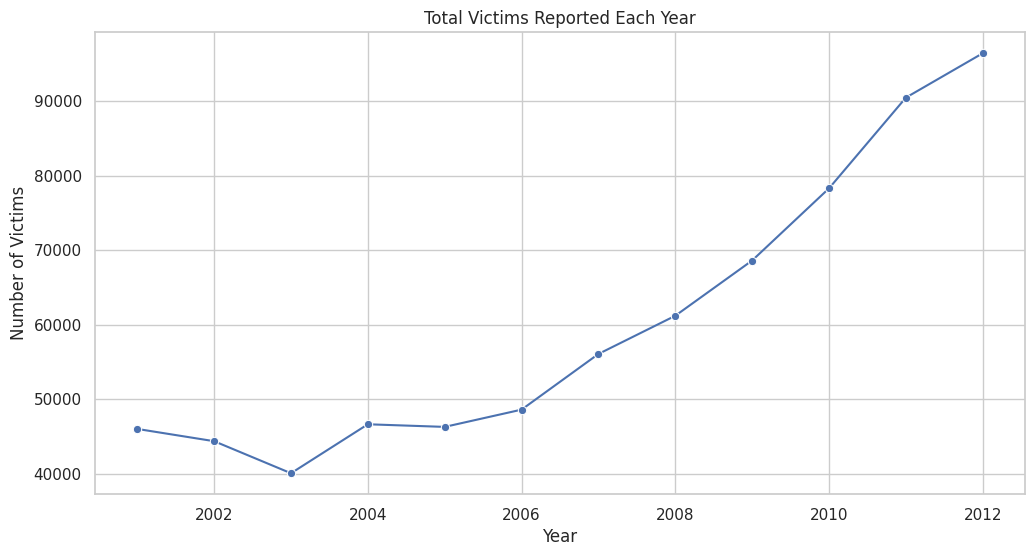

In [133]:
yearly_victims = df.groupby('Year')['Grand_Total'].sum()
sns.lineplot(x=yearly_victims.index, y=yearly_victims.values, marker='o')
plt.title('Total Victims Reported Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.show()

**Top 10 States/UTs by Total Victims**

<ipython-input-134-fbcd5a37659d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')


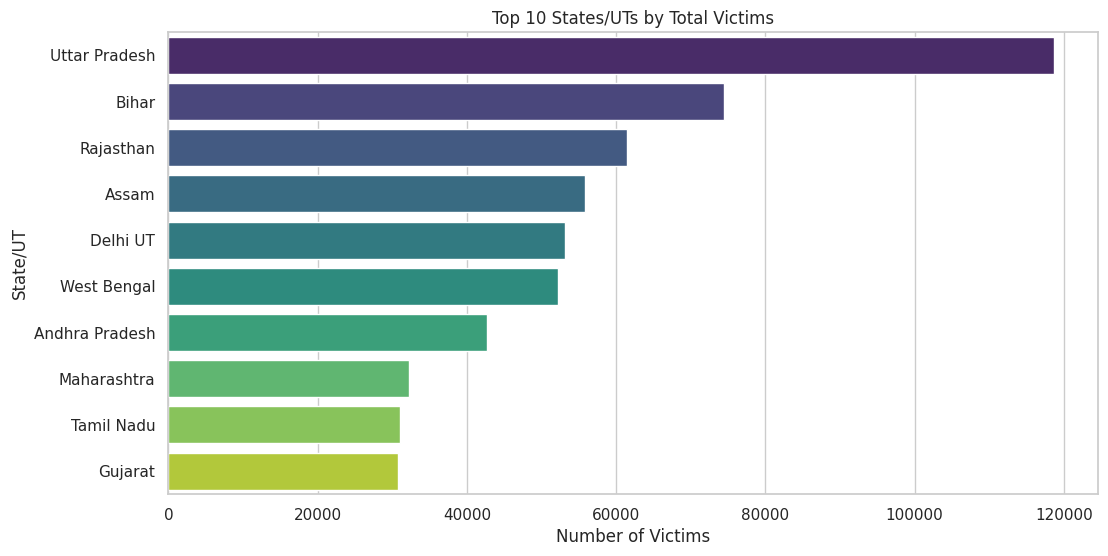

In [134]:
top_states = df.groupby('State_UT')['Grand_Total'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')
plt.title('Top 10 States/UTs by Total Victims')
plt.xlabel('Number of Victims')
plt.ylabel('State/UT')
plt.show()

**Victims by Purpose**

<ipython-input-135-fa413d5bfdd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.values, y=purpose_counts.index, palette='coolwarm')


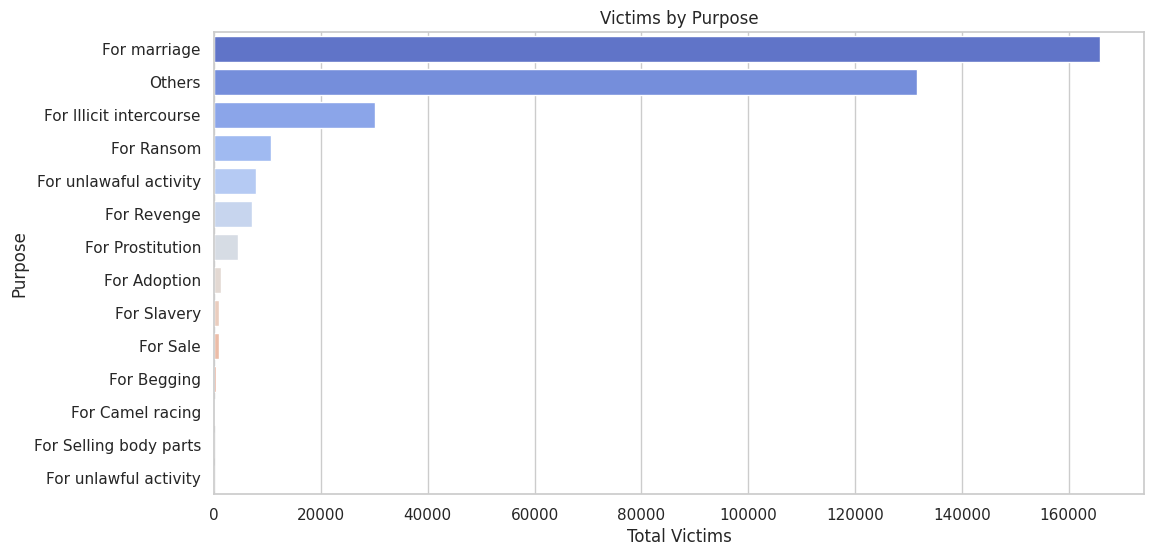

In [135]:

purpose_counts = df.groupby('Purpose')['Grand_Total'].sum().sort_values(ascending=False)
purpose_counts=purpose_counts.drop('Total')
sns.barplot(x=purpose_counts.values, y=purpose_counts.index, palette='coolwarm')
plt.title('Victims by Purpose')
plt.xlabel('Total Victims')
plt.ylabel('Purpose')
plt.show()

**Gender-wise Distribution**

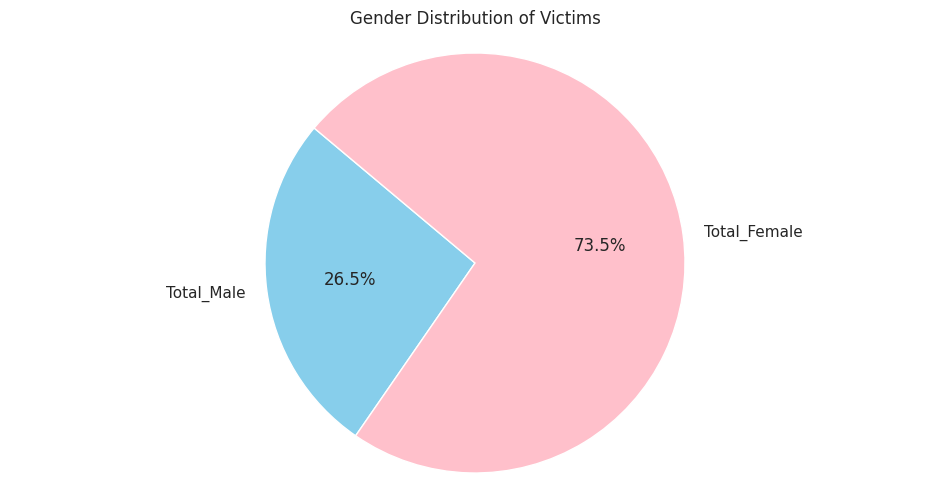

In [136]:
gender_totals = df[['Total_Male', 'Total_Female']].sum()
plt.pie(gender_totals, labels=gender_totals.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
plt.title('Gender Distribution of Victims')
plt.axis('equal')
plt.show()

**Correlation Heatmap**

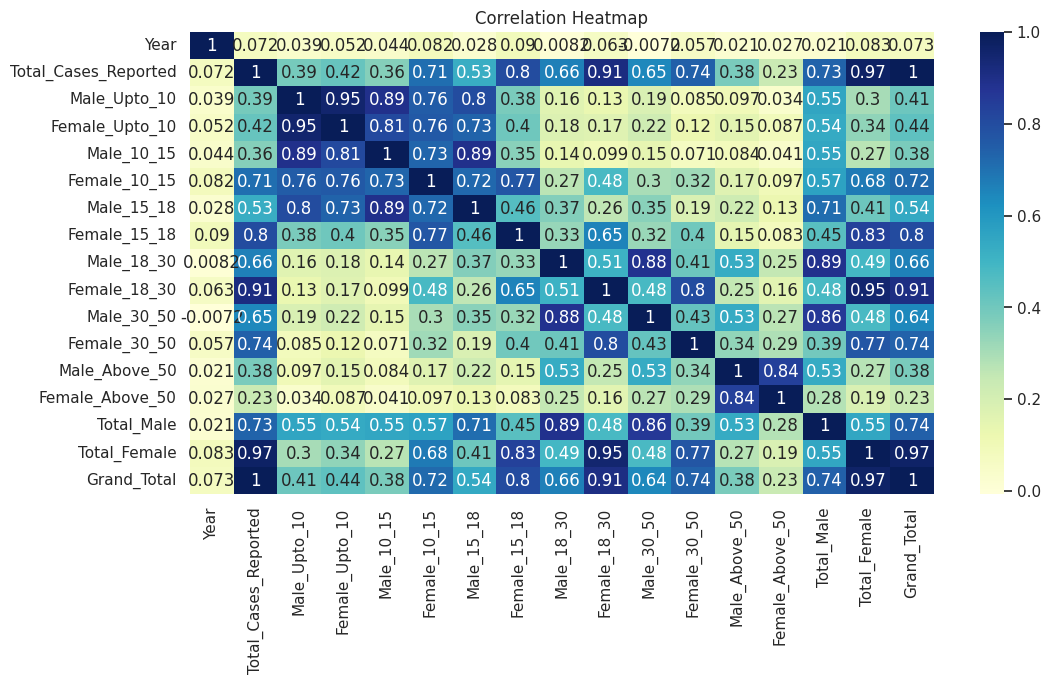

In [137]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

**Gender by Year**

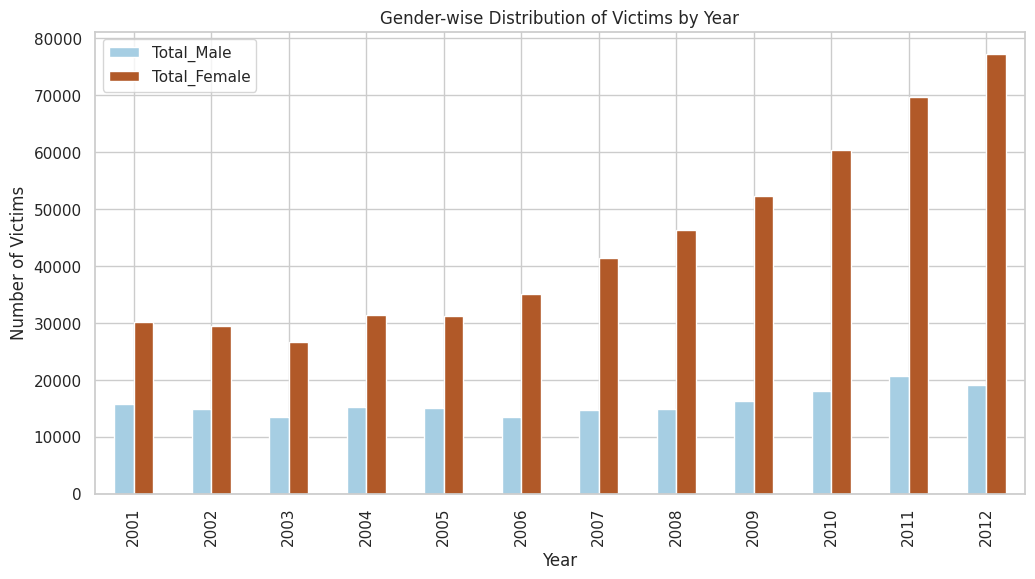

In [138]:
gender_by_year = df.groupby('Year')[['Total_Male', 'Total_Female']].sum()
gender_by_year.plot(kind='bar', colormap='Paired')
plt.title('Gender-wise Distribution of Victims by Year')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.show()

**Victims by Age and Gender**

<ipython-input-139-49168e07de2e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_totals.values, y=age_totals.index, palette='cubehelix')


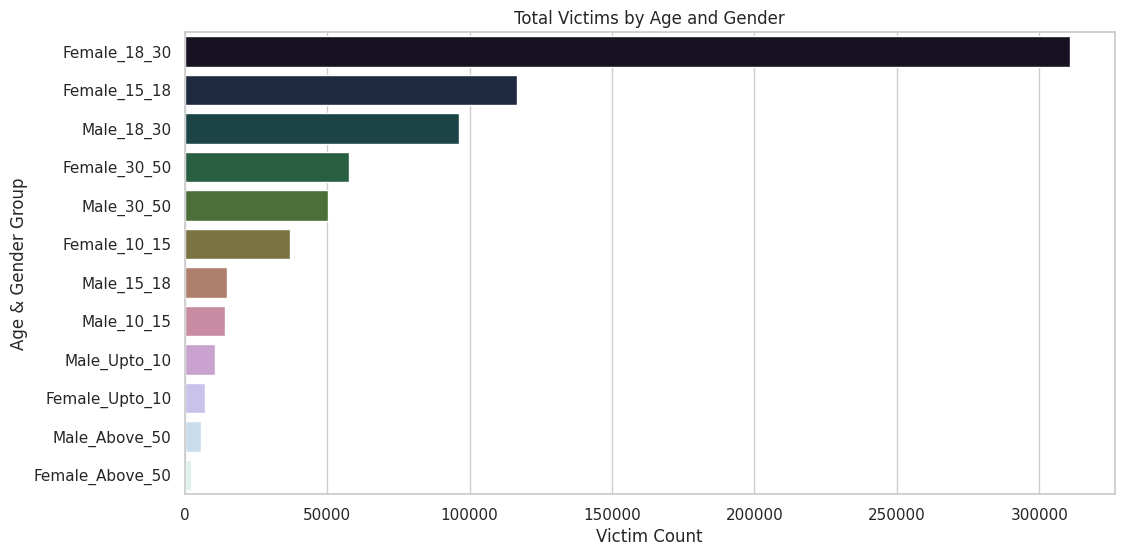

In [139]:
age_groups = [
    'Male_Upto_10', 'Female_Upto_10',
    'Male_10_15', 'Female_10_15',
    'Male_15_18', 'Female_15_18',
    'Male_18_30', 'Female_18_30',
    'Male_30_50', 'Female_30_50',
    'Male_Above_50', 'Female_Above_50'
]
age_totals = df[age_groups].sum().sort_values(ascending=False)
sns.barplot(x=age_totals.values, y=age_totals.index, palette='cubehelix')
plt.title('Total Victims by Age and Gender')
plt.xlabel('Victim Count')
plt.ylabel('Age & Gender Group')
plt.show()

**Top 5 Purposes by Gender**

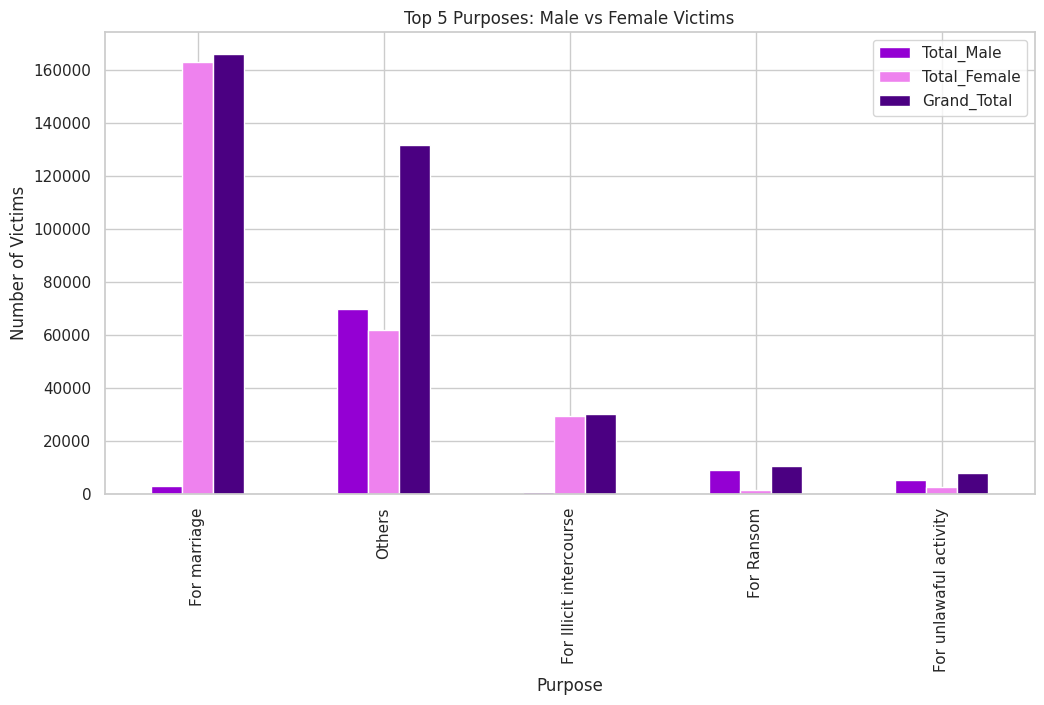

In [140]:
top_5_purposes = df.groupby('Purpose')[['Total_Male', 'Total_Female','Grand_Total']].sum().sort_values(by='Grand_Total', ascending=False).head(6)
top_5_purposes=top_5_purposes.drop('Total')
top_5_purposes.plot(kind='bar',color=['darkviolet','violet','indigo'])
plt.title('Top 5 Purposes: Male vs Female Victims')
plt.xlabel('Purpose')
plt.ylabel('Number of Victims')
plt.show()

**Yearly Trend in a Specific State**

In [141]:
print(df['State_UT'].unique())

['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'A&N Islands'
 'Chandigarh' 'D&N Haveli' 'Daman & Diu' 'Delhi UT' 'Lakshadweep'
 'Puducherry']


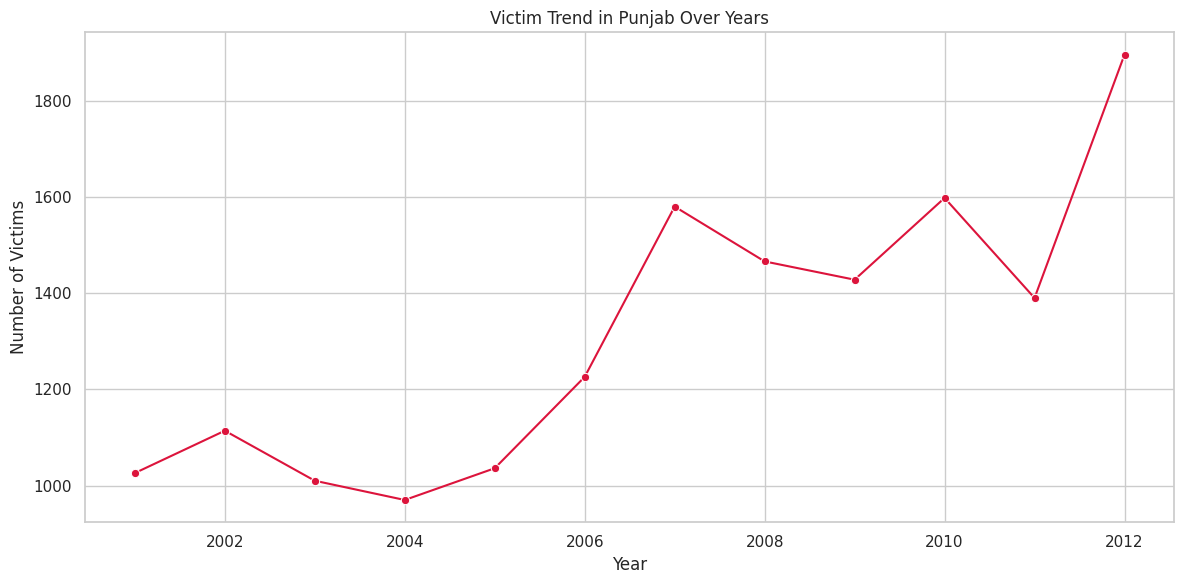

In [142]:
if 'Punjab' in df['State_UT'].unique():
    maha_data = df[df['State_UT'] == 'Punjab']
    maha_trend = maha_data.groupby('Year')['Grand_Total'].sum()

    sns.lineplot(x=maha_trend.index, y=maha_trend.values, marker='o', color='crimson')
    plt.title('Victim Trend in Punjab Over Years')
    plt.xlabel('Year')
    plt.ylabel('Number of Victims')
    plt.tight_layout()
    plt.show()
else:
    print("Punjab not found in dataset.")


**Boxplot of Victims by Purpose**

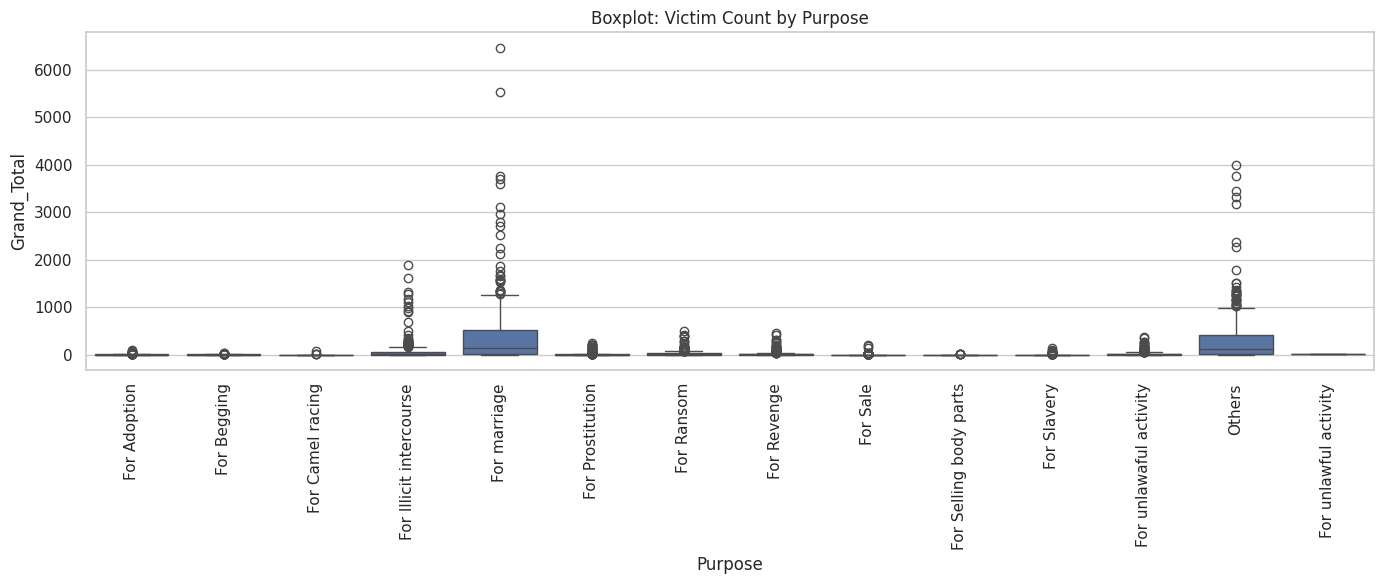

In [143]:
plt.figure(figsize=(14, 6))
ak=df
ak=df[df['Purpose']!='Total']
sns.boxplot(x='Purpose', y='Grand_Total', data=ak)
plt.xticks(rotation=90)
plt.title('Boxplot: Victim Count by Purpose')
plt.tight_layout()
plt.show()


**Prediction + Labeled Plot for 2024 & 2025**

Predicted victims in 2024: 145911
Predicted victims in 2025: 150807


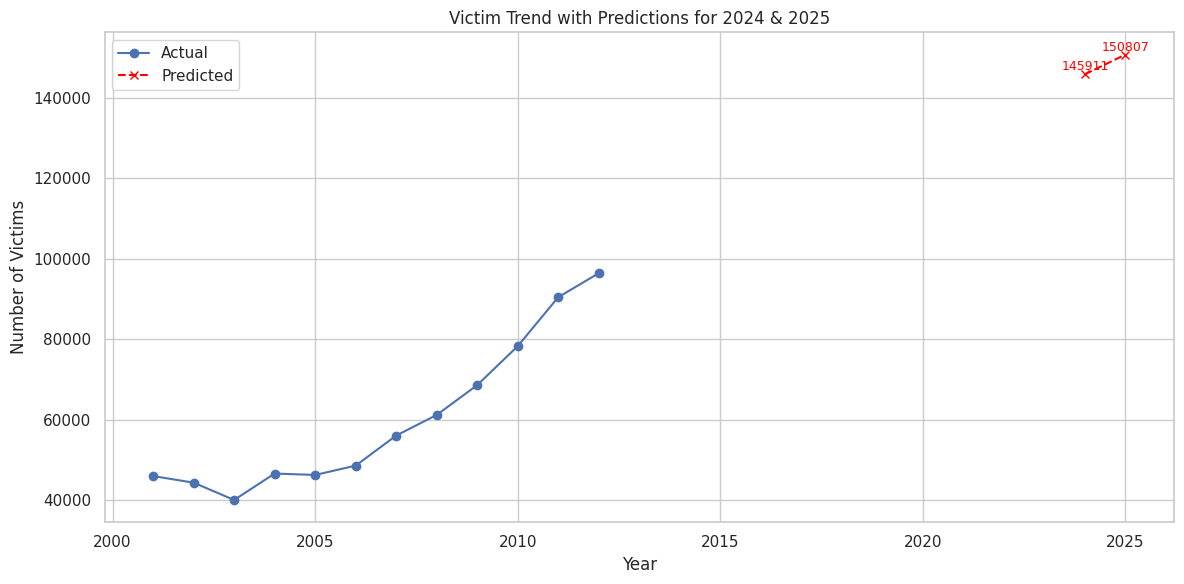

In [144]:
# Group total victims by year
trend = df.groupby('Year')['Grand_Total'].sum().reset_index()

# Prepare the data
X = trend['Year'].values.reshape(-1, 1)
y = trend['Grand_Total'].values

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict for 2024 and 2025
future_years = np.array([[2024], [2025]])
predicted = model.predict(future_years)

# Print predictions
for year, value in zip(future_years.flatten(), predicted):
    print(f"Predicted victims in {year}: {int(value)}")

# Plot actual data
plt.plot(trend['Year'], y, marker='o', label='Actual')

# Plot predictions
plt.plot(future_years, predicted, marker='x', linestyle='--', color='red', label='Predicted')

# Add value labels to predicted points
for year, value in zip(future_years.flatten(), predicted):
    plt.text(year, value + 1000, f'{int(value)}', ha='center', fontsize=9, color='red')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.title('Victim Trend with Predictions for 2024 & 2025')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Paired T-test (Male vs. Female Victims)**

In [145]:
# Perform paired T-test
t_stat, p_value = ttest_rel(df['Total_Male'], df['Total_Female'])

print("Paired T-test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference between male and female victims.")
else:
    print("No significant difference between male and female victims.")


Paired T-test Results:
T-statistic: -13.7687
P-value: 0.0000
Significant difference between male and female victims.


**Male victims in 2001 vs. 2002**

In [146]:
# Now extract cleanly
male_2001 = df[df['Year'] == 2001]['Total_Male'].dropna()
male_2002 = df[df['Year'] == 2002]['Total_Male'].dropna()

# Calculate statistics
mean1, mean2 = male_2001.mean(), male_2002.mean()
std1, std2 = male_2001.std(), male_2002.std()
n1, n2 = len(male_2001), len(male_2002)

# Z-test
se = np.sqrt((std1**2)/n1 + (std2**2)/n2)
z = (mean1 - mean2) / se
p = 2 * (1 - norm.cdf(abs(z)))

# Output results
print("Z-Statistic:", round(z, 3))
print("P-Value:", round(p, 4))

alpha = 0.05
print("\nConclusion:")
if p < alpha:
    print("The difference in male victims between 2001 and 2002 is statistically significant.")
else:
    print("There is no statistically significant difference in male victims between 2001 and 2002.")


Z-Statistic: 0.329
P-Value: 0.7421

Conclusion:
There is no statistically significant difference in male victims between 2001 and 2002.
